In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

path = "C:/Users/Phillthy/Documents/Thinkful DS - PowerBlock/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# First Look Data Exploration

From the .info we see there are 35 columns, let's set pandas to output a few rows of all columns to see what kind of information is stored in the dataset.

In [4]:
pd.set_option('display.max_columns', 35)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Questionnaire Legend

There are a variety of questionnaire answers that can be interpreted using the follow guide:

**Education** 
<br>1 'Below College' 
<br>2 'College' 
<br>3 'Bachelor' 
<br>4 'Master' 
<br>5 'Doctor'

**EnvironmentSatisfaction** 
<br>1 'Low' 
<br>2 'Medium' 
<br>3 'High' 
<br>4 'Very High'

**JobInvolvement**
<br>1 'Low' 
<br>2 'Medium' 
<br>3 'High' 
<br>4 'Very High'

**JobSatisfaction**
<br>1 'Low' 
<br>2 'Medium' 
<br>3 'High' 
<br>4 'Very High'

**PerformanceRating**
<br>1 'Low' 
<br>2 'Good' 
<br>3 'Excellent' 
<br>4 'Outstanding'

**RelationshipSatisfaction**
<br>1 'Low' 
<br>2 'Medium' 
<br>3 'High' 
<br>4 'Very High'

**WorkLifeBalance** 
<br>1 'Bad' 
<br>2 'Good'
<br>3 'Better'
<br>4 'Best'

The main points of interest in this dataset concern employee attrition and answers to the populations answers to questionnaires, their educational background, paygrade, and other various workplace and personal life factors.

Time to visualize the relationship between the two groups of attrition.  Those employees who've left and those that have stayed.

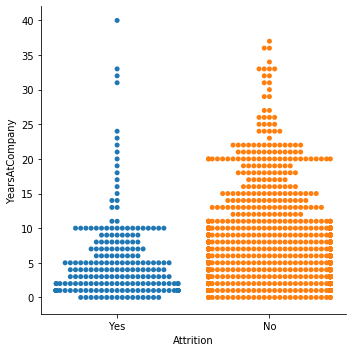

In [5]:
Attrition = df['Attrition']
YearsAtCompany = df['YearsAtCompany']


sns.catplot(x="Attrition", y="YearsAtCompany", kind="swarm", data=df)


There are fewer employees where attrition has occured.  The population sizes are very different, as seen in the scatter plots below.  

In [6]:
print('The tally between Attrition Groups Yes vs No')
print()
print('Those that have left') 
print(df.Attrition[df.Attrition == 'Yes'].count())
print()
print('Those that have stayed')
print(df.Attrition[df.Attrition == 'No'].count())

The tally between Attrition Groups Yes vs No

Those that have left
237

Those that have stayed
1233


This seems problematic to some degree since there is a lack of information regarding emplyees that have left the company.

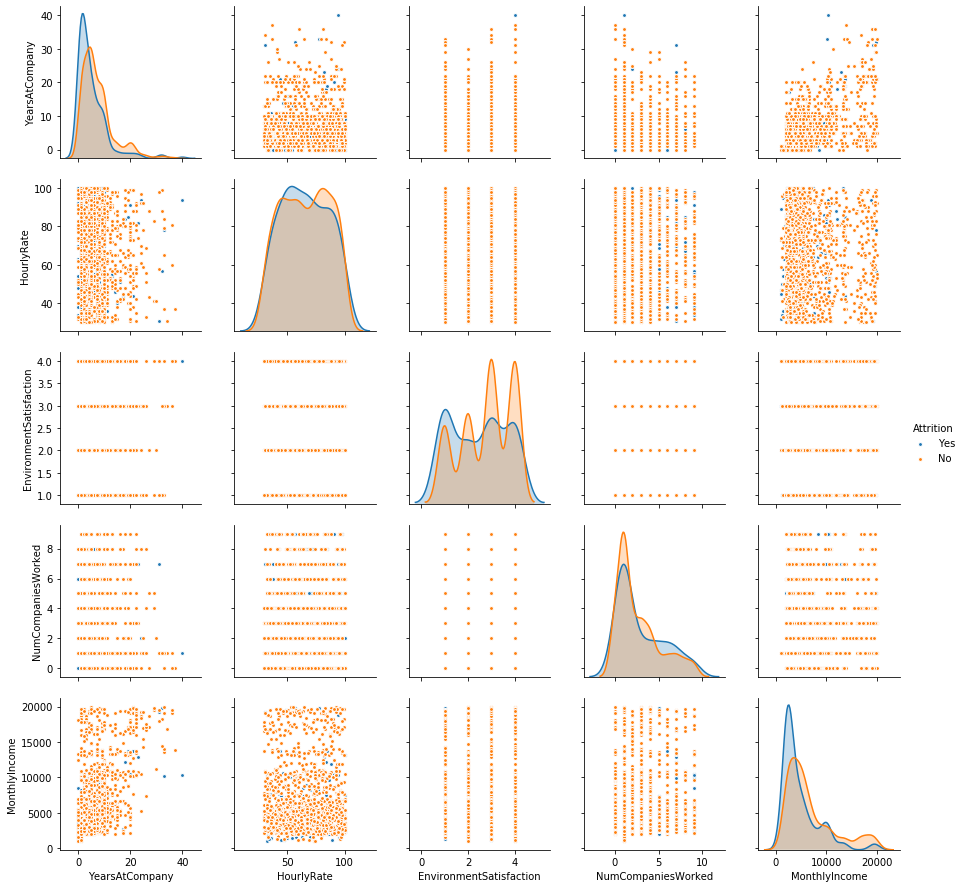

In [7]:
sns.pairplot(df, vars=['YearsAtCompany', 'HourlyRate', 'EnvironmentSatisfaction', 'NumCompaniesWorked','MonthlyIncome'], hue='Attrition', plot_kws=dict(s=15, linewidth=1), diag_kws=dict(shade=True))


Looks like employees that have left the company show slighty higher reported number of "1 'Low'"  to the Environmental Satisfaction survey.  Monthly income of employees leaving is lower than employees that have stayed, and a large numbers of employees seem to attrition before or around the 5 year mark.

Taking a closer look at employees' responses to environmental satisfaction compared against their job satiscation levels

Text(0, 0.5, 'Job Involvement Score')

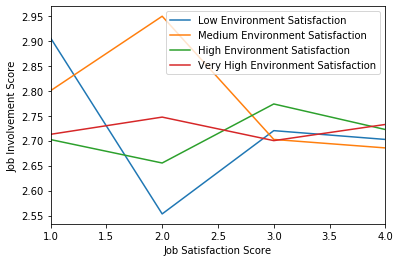

In [8]:
fig = df[df.EnvironmentSatisfaction==1][['JobInvolvement','JobSatisfaction']].groupby('JobSatisfaction').mean().plot()
df[df.EnvironmentSatisfaction==2][['JobInvolvement','JobSatisfaction']].groupby('JobSatisfaction').mean().plot(ax=fig)
df[df.EnvironmentSatisfaction==3][['JobInvolvement','JobSatisfaction']].groupby('JobSatisfaction').mean().plot(ax=fig)
df[df.EnvironmentSatisfaction==4][['JobInvolvement','JobSatisfaction']].groupby('JobSatisfaction').mean().plot(ax=fig)
plt.legend(['Low Environment Satisfaction', 'Medium Environment Satisfaction', 'High Environment Satisfaction', 'Very High Environment Satisfaction'])
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Job Involvement Score')

Employees with low and medium job satisfaction scores also reported low satisfaction with their work environment.  Is this significant?


Text(0, 0.5, 'Job Satisfaction Score')

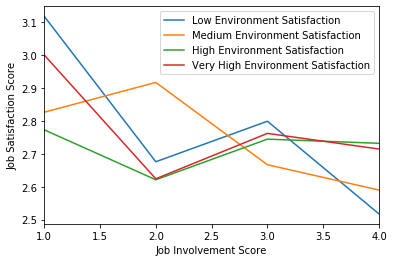

In [30]:
fig = df[df.EnvironmentSatisfaction==1][['JobInvolvement','JobSatisfaction']].groupby('JobInvolvement').mean().plot()

df[df.EnvironmentSatisfaction==2][['JobInvolvement','JobSatisfaction']].groupby('JobInvolvement').mean().plot(ax=fig)

df[df.EnvironmentSatisfaction==3][['JobInvolvement','JobSatisfaction']].groupby('JobInvolvement').mean().plot(ax=fig)

df[df.EnvironmentSatisfaction==4][['JobInvolvement','JobSatisfaction']].groupby('JobInvolvement').mean().plot(ax=fig)

plt.legend(['Low Environment Satisfaction', 'Medium Environment Satisfaction', 'High Environment Satisfaction', 'Very High Environment Satisfaction'])

plt.xlabel('Job Involvement Score')
plt.ylabel('Job Satisfaction Score')

In [10]:
df[df.JobInvolvement==1][['RelationshipSatisfaction']].mean()



RelationshipSatisfaction    2.650602
dtype: float64

In [11]:
df[df.JobInvolvement==2][['RelationshipSatisfaction']].mean()

RelationshipSatisfaction    2.656
dtype: float64

In [12]:
df[df.JobInvolvement==3][['RelationshipSatisfaction']].mean()

RelationshipSatisfaction    2.733871
dtype: float64

In [13]:
df[df.JobInvolvement==4][['RelationshipSatisfaction']].mean()

RelationshipSatisfaction    2.763889
dtype: float64

In [28]:
print(stats.ttest_ind(df[df.JobSatisfaction > 3].Attrition == 'No',
                          df[df.JobSatisfaction < 3].Attrition == 'Yes'))

Ttest_indResult(statistic=30.195260202218943, pvalue=7.832848265424789e-144)


The relationship between job satisfaction and attrition is not significant.  This must mean there is another relationship elsewhere effecting Attrition and employee drop outs which might lead us to a hypothesis and experiment to propose. 

Text(0.5, 1.05, 'Correlation Matrix')

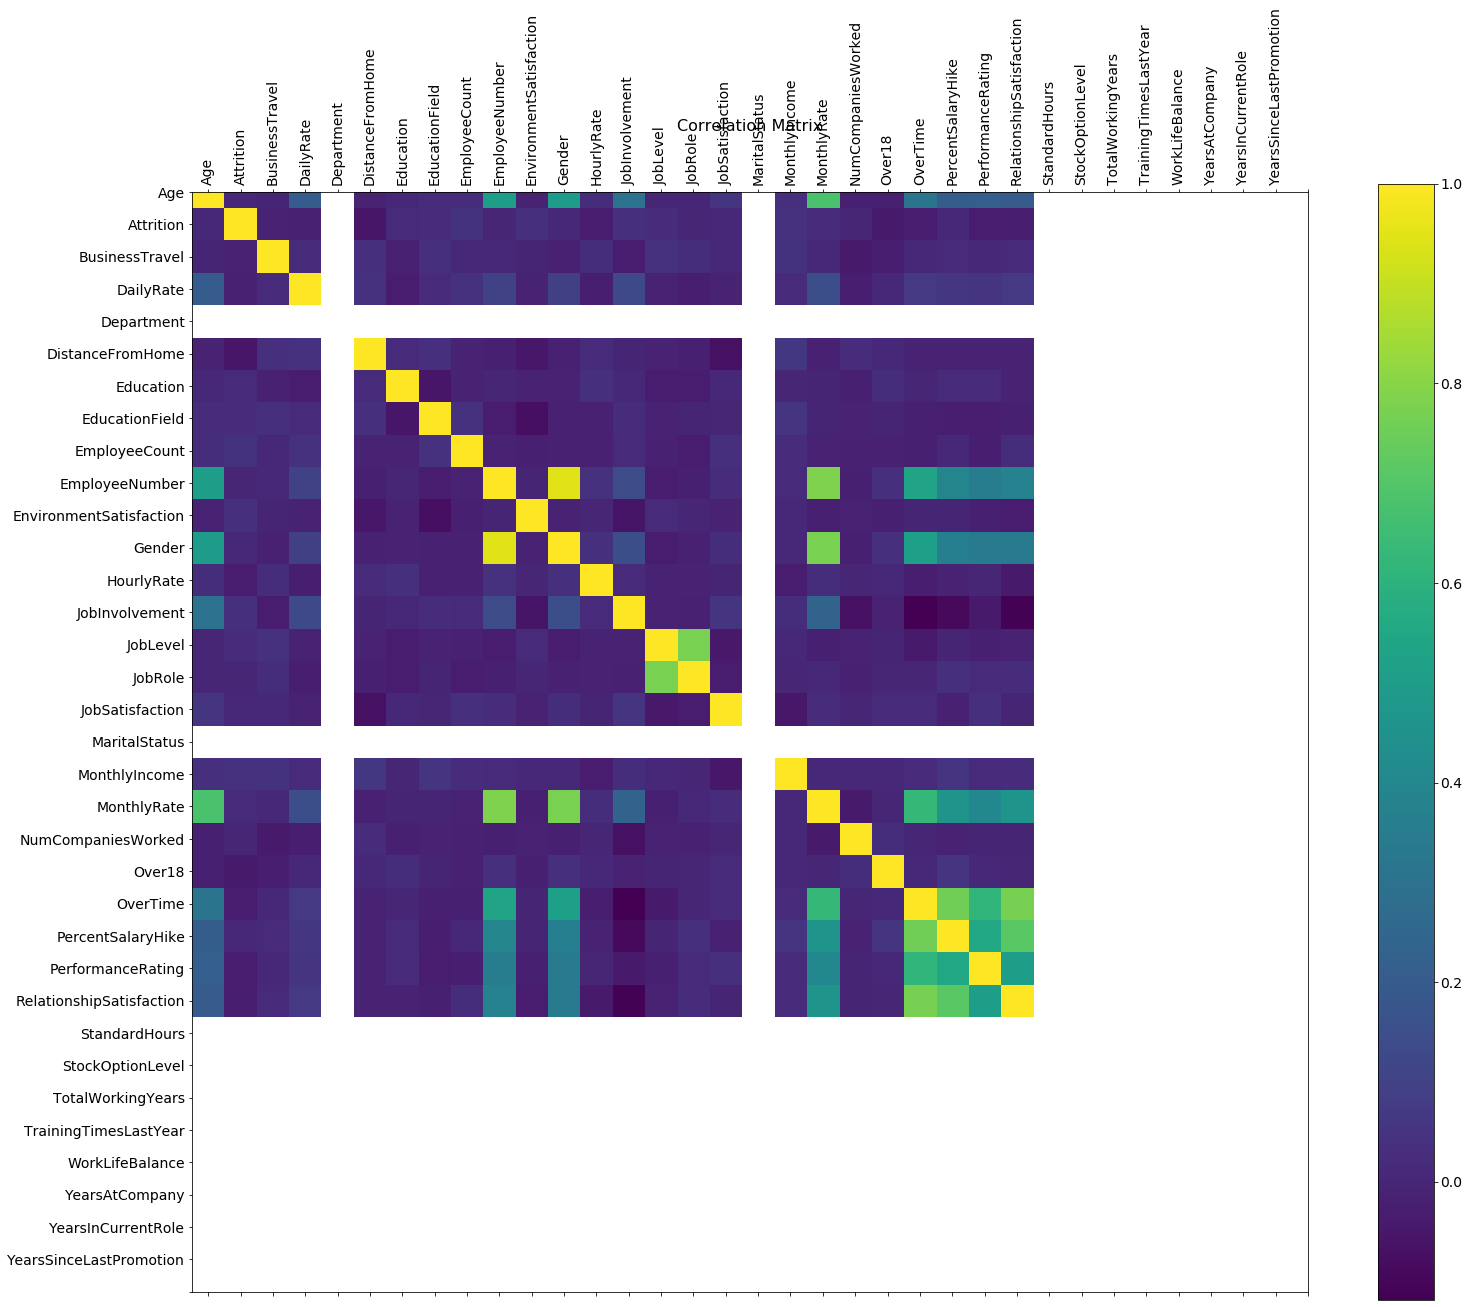

In [26]:
f = plt.figure(figsize=(25, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns[0:34], fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns[0:34], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Looks like Overtime, Relationship Satisfaction, Percent Salary Hike, Age and Monthly Income are important and share some correlations.  What kind of question can I come up with? 

Overtime and Monthly Rate have a good relationship.  Workers that get to work overtime will certainly have a higher monthly income over their peers who do not have access to over time.  Those with access to overtime appear to have higher relationship satisfaction as well.

In [67]:
x = df.Attrition[df.Attrition == 'Yes'][df.OverTime == 'Yes']
denom = df.Attrition[df.Attrition == 'Yes'].count()
print(len(x) / denom * 100)
print('53.5% had overtime and left while 46.6% of employees did not have overtime')

53.58649789029536
53.5% had overtime and left while 46.6% of employees did not have overtime


Almost half of employees that left had no overtime option.  Their income was lower than their peers with overtime.

# Proposal

Granting more employees overtime will reduce employee churn